<a href="https://colab.research.google.com/github/VictoriaOlejarz/Data-Science-Consulting/blob/main/consulting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Key idea we are focusing during this consulting project is evaulating the reliability of the Airbeam3 sensors. Analyzing individual sensors will help us compare the data to each other to see how similar/different the sensors pick up on the variable measurements.


Looking at summary statistics of the variables and changes over time

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')


print(df.columns)

#looking at the summary stats for all the measurements in the dataset
tempsum = df['Temperature'].describe()
print(tempsum)


humsum = df['Humidity'].describe()
print(humsum)

pm25_summary = df['PM2.5'].describe()
print(pm25_summary)


pm10_summary = df['PM10'].describe()
print(pm10_summary)


pm1_summary = df['PM1'].describe()
print(pm1_summary)





Index(['Session_Name', 'Timestamp', 'Latitude', 'Longitude', 'Temperature',
       'PM1', 'PM10', 'PM2.5', 'Humidity', 'Airbeam_name'],
      dtype='object')
count    406770.000000
mean         77.508828
std           9.804011
min          42.750000
25%          72.000000
50%          79.000000
75%          84.000000
max         104.000000
Name: Temperature, dtype: float64
count    406775.000000
mean         27.565579
std           9.505537
min           5.000000
25%          20.000000
50%          26.000000
75%          33.000000
max          68.800000
Name: Humidity, dtype: float64
count    406754.000000
mean          7.455745
std          17.830464
min           0.000000
25%           0.000000
50%           2.000000
75%           8.600000
max         310.000000
Name: PM2.5, dtype: float64
count    407634.000000
mean         10.039320
std          31.726742
min           0.000000
25%           0.000000
50%           2.000000
75%           8.800000
max         601.000000
Name: PM10, d

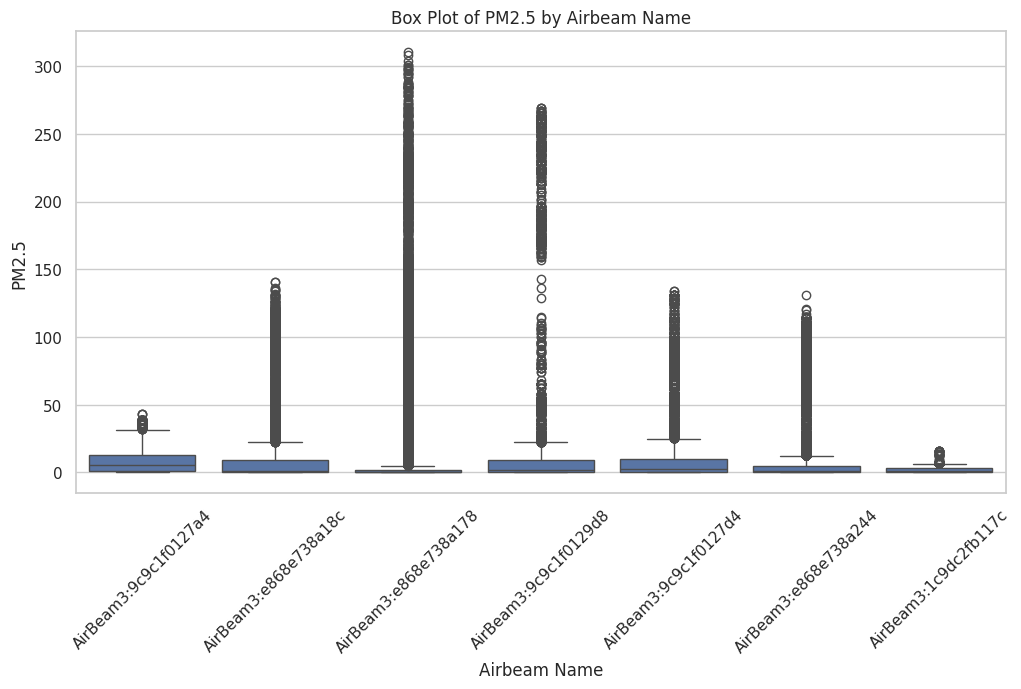

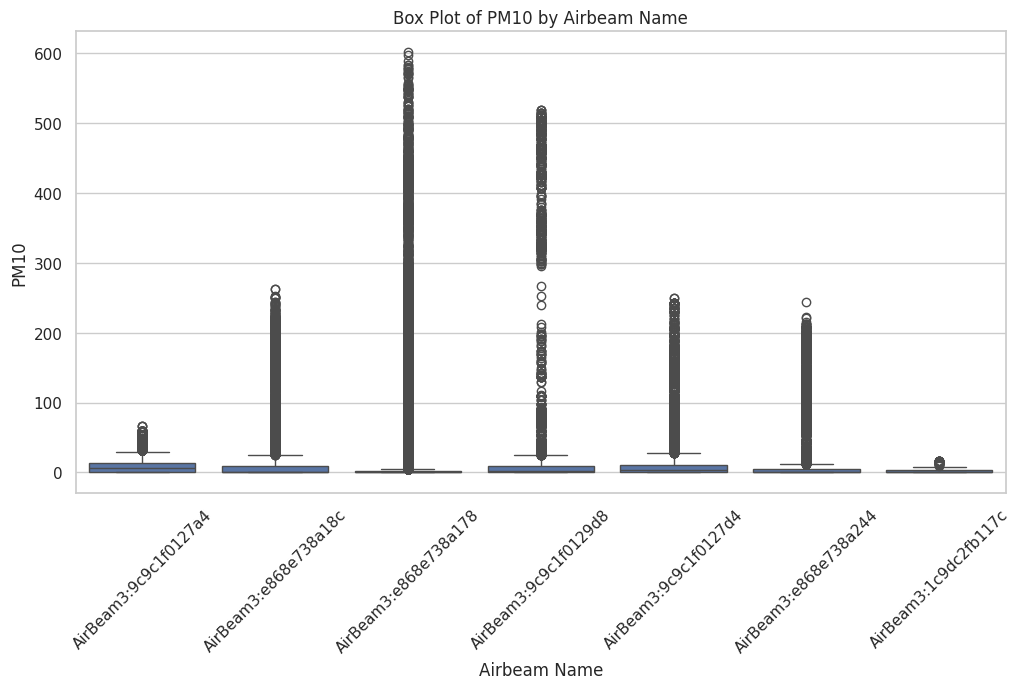

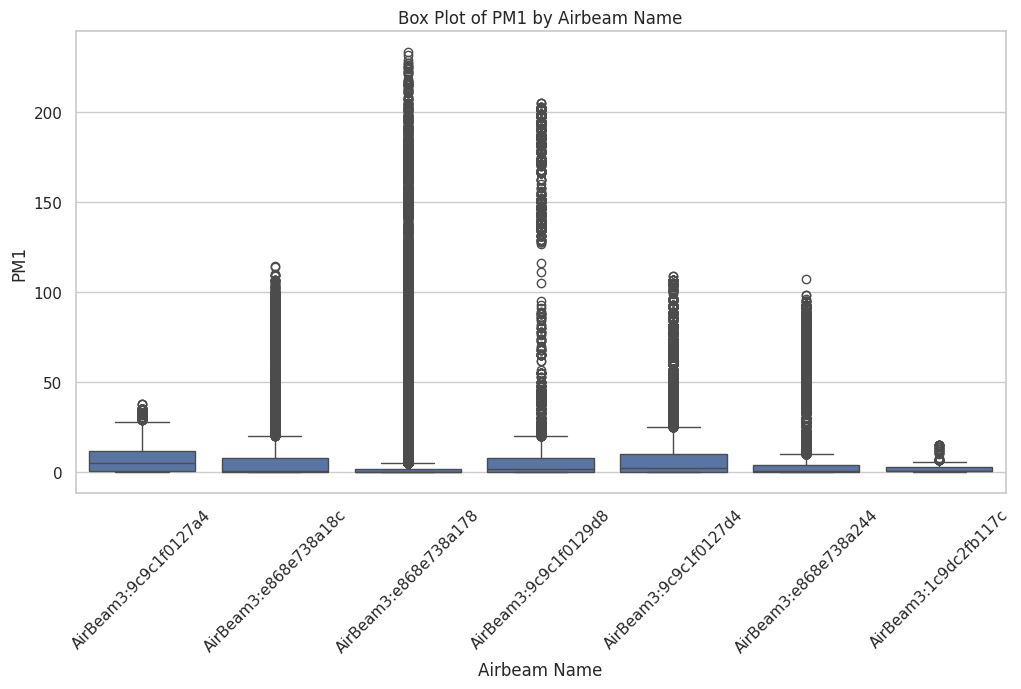

In [ ]:

#grouping the data by airbeam name and looking at boxplots for the variables
sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Airbeam_name', y='PM2.5')
plt.xlabel('Airbeam Name')
plt.ylabel('PM2.5')
plt.title('Box Plot of PM2.5 by Airbeam Name')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Airbeam_name', y='PM10')
plt.xlabel('Airbeam Name')
plt.ylabel('PM10')
plt.title('Box Plot of PM10 by Airbeam Name')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Airbeam_name', y='PM1')
plt.xlabel('Airbeam Name')
plt.ylabel('PM1')
plt.title('Box Plot of PM1 by Airbeam Name')
plt.xticks(rotation=45)
plt.show()





Many outliers when looking at PM1, Pm2.5 and PM10.

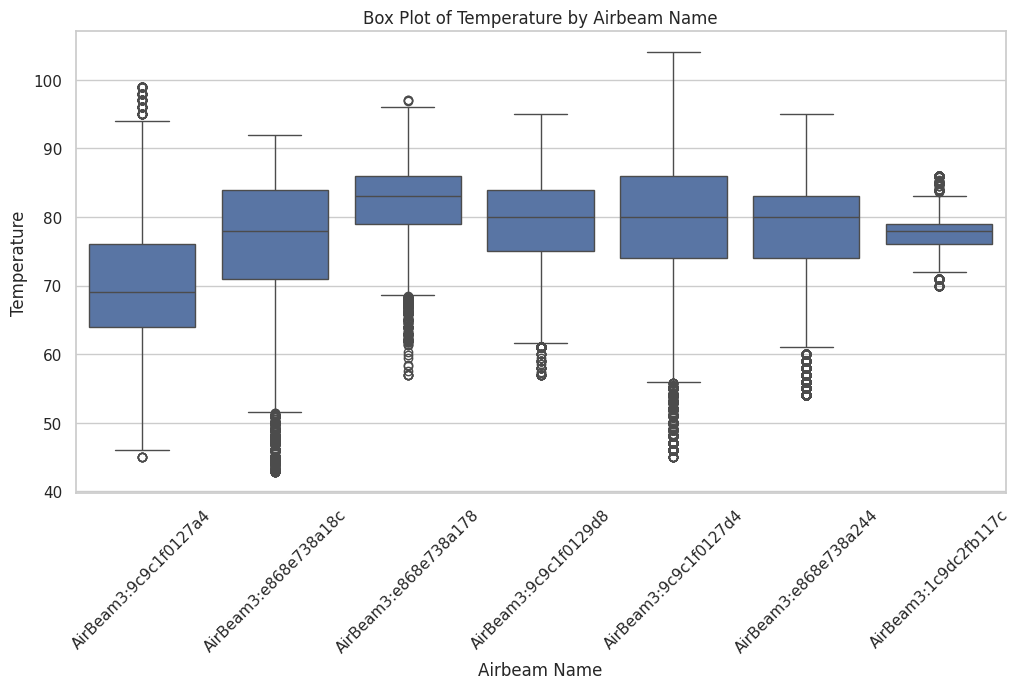

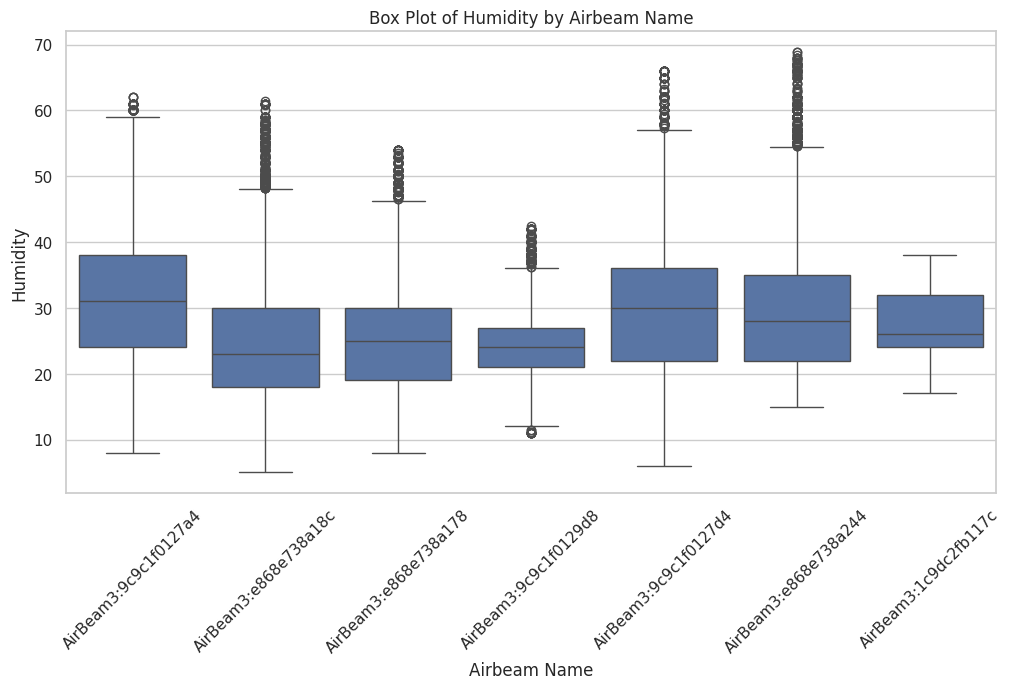

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Airbeam_name', y='Temperature')
plt.xlabel('Airbeam Name')
plt.ylabel('Temperature')
plt.title('Box Plot of Temperature by Airbeam Name')
plt.xticks(rotation=45)
plt.show()




plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Airbeam_name', y='Humidity')
plt.xlabel('Airbeam Name')
plt.ylabel('Humidity')
plt.title('Box Plot of Humidity by Airbeam Name')
plt.xticks(rotation=45)
plt.show()

Interesting to see average temperature to be recorded around 70-80 degrees farehnehit as these sensors were active during March- April in Chicago (when it was not quite this warm yet).
Humidity has fairly steady recordings, but individual sensors pick up data differently.

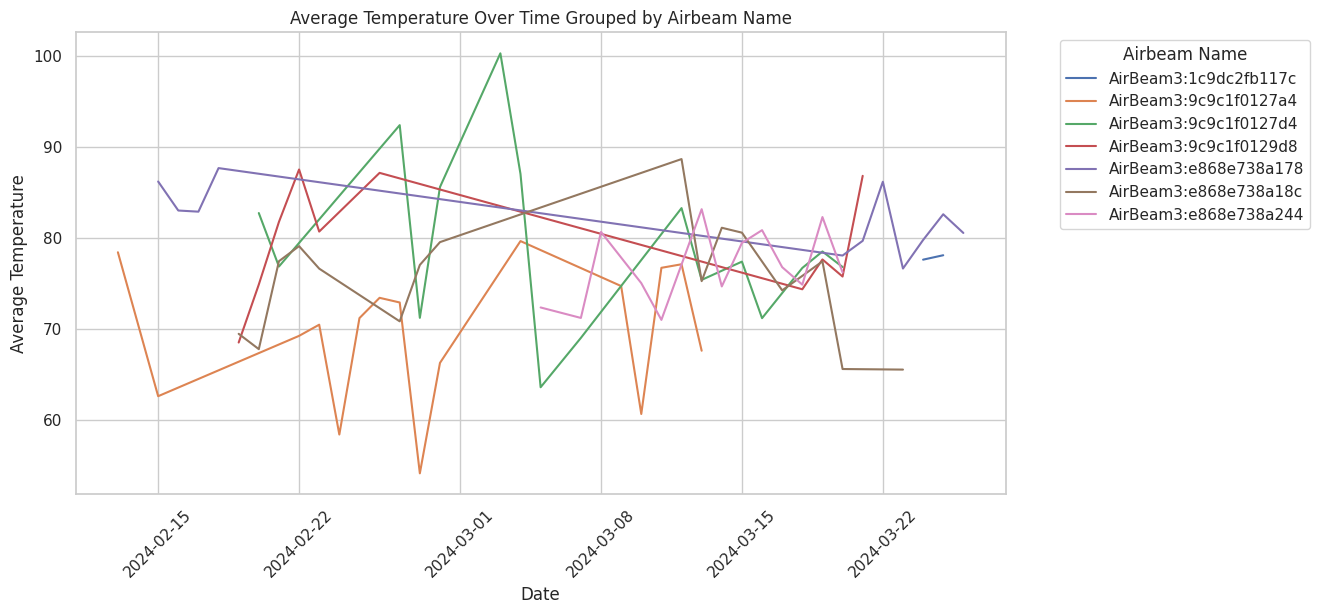

In [ ]:

#how average temperature changes over time grouped by airbeam name

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Date'] = df['Timestamp'].dt.date

avg_temp_by_airbeam_over_date = df.groupby(['Airbeam_name', 'Date'])['Temperature'].mean().reset_index()

plt.figure(figsize=(12, 6))

for airbeam_name, group in avg_temp_by_airbeam_over_date.groupby('Airbeam_name'):
    plt.plot(group['Date'], group['Temperature'], label=airbeam_name)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Time Grouped by Airbeam Name')
plt.legend(title='Airbeam Name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)

plt.show()

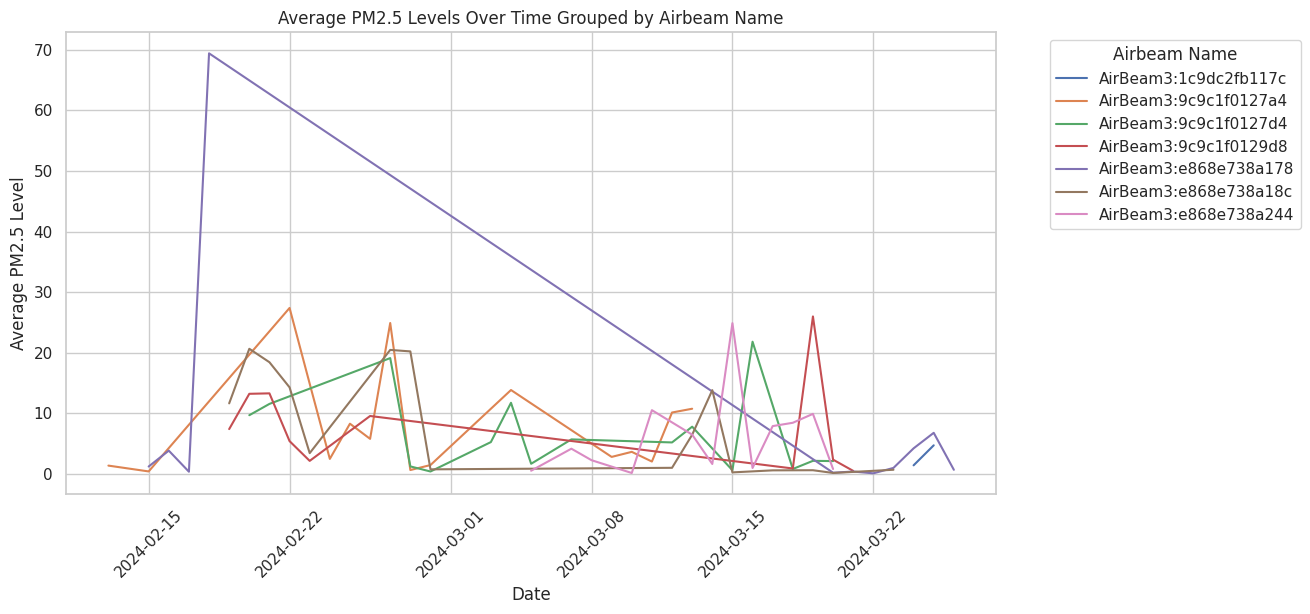

In [ ]:




#how average pm2.5 changes over time grouped by airbeam name
avg_pm25_by_airbeam_over_date = df.groupby(['Airbeam_name', 'Date'])['PM2.5'].mean().reset_index()


plt.figure(figsize=(12, 6))

for airbeam_name, group in avg_pm25_by_airbeam_over_date.groupby('Airbeam_name'):
    plt.plot(group['Date'], group['PM2.5'], label=airbeam_name)

plt.xlabel('Date')
plt.ylabel('Average PM2.5 Level')
plt.title('Average PM2.5 Levels Over Time Grouped by Airbeam Name')
plt.legend(title='Airbeam Name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)

plt.show()


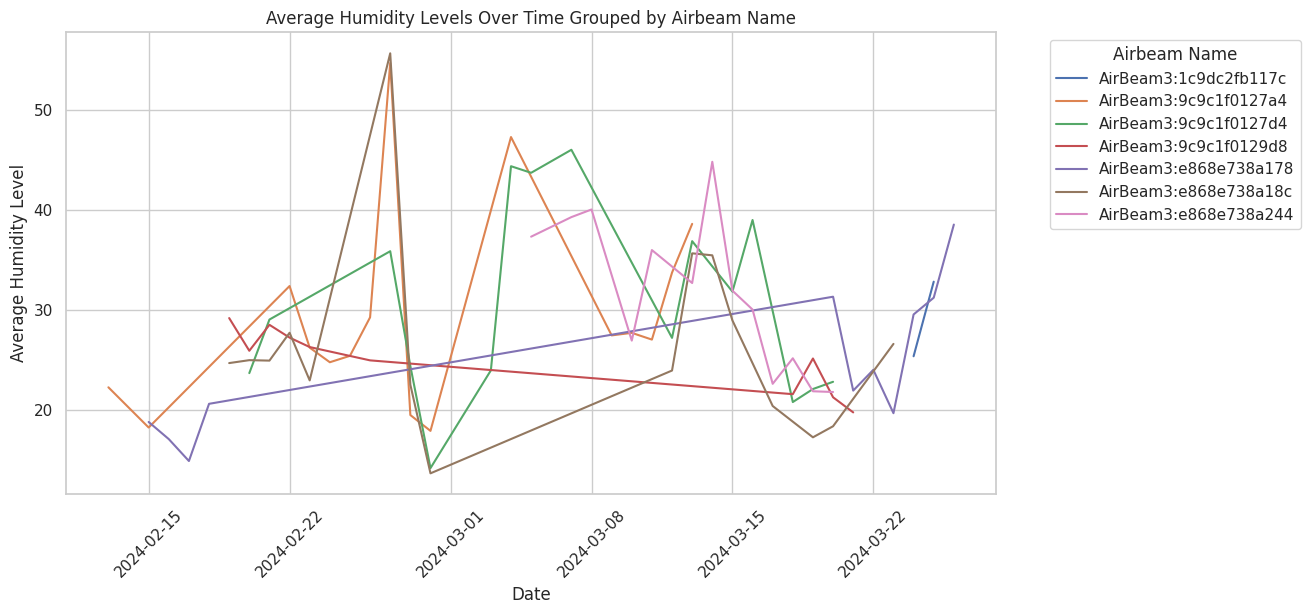

In [ ]:
#how humidity changes over time grouped by airbeam name

avg_humidity_by_airbeam_over_date = df.groupby(['Airbeam_name', 'Date'])['Humidity'].mean().reset_index()

plt.figure(figsize=(12, 6))

for airbeam_name, group in avg_humidity_by_airbeam_over_date.groupby('Airbeam_name'):
    plt.plot(group['Date'], group['Humidity'], label=airbeam_name)


plt.xlabel('Date')
plt.ylabel('Average Humidity Level')
plt.title('Average Humidity Levels Over Time Grouped by Airbeam Name')
plt.legend(title='Airbeam Name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)

plt.show()



Given these graphs, we come to the clearest conclusion we can make that Airbeam...178 has the most drastic inconsistencies (especially when looking into its recordings of PM levels whcih our main area of focus).

*Deeper explanation found in the full report (project writeup pdf)